# 자치구별 공원 분석

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving report.txt to report.txt


In [141]:
pop_df = pd.read_csv(filename, sep='\t')[1:] # 슬라이싱을 안하는 경우 포함할 코드 : pop_df.drop(index=0, inplace=True)
pop_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"
5,2020,광진구,"360,109",17.06,"21,105"


In [4]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울공원요약.csv to 서울공원요약.csv


In [142]:
park_df = pd.read_csv(filename)
park_df.head()

,공원명,지역,위도,경도,면적,분류,크기
0,남산도시자연공원,중구,37.550140,126.990377,2896887,대형,15
1,길동생태공원,강동구,37.540394,127.154779,80683,소형,3
2,서울대공원,과천시,37.426449,127.019846,9132690,대형,15
3,서울숲,성동구,37.543072,127.041798,480994,중형,7
4,월드컵공원,마포구,37.571805,126.878907,2284085,대형,15


- 1. 자치구별로 공원면적과 공원수를 집계하시오.

In [156]:
df = park_df.groupby('지역')[['면적']].agg(['sum', 'count'])
df.columns = ['공원면적', '공원수']
df.head()

,공원면적,공원수
지역,,
강남구,3626398,7
강동구,1526387,7
강북구,3714902,4
강서구,2194152,9
과천시,9132690,1


- 2. 구별 공원면적 비율과 인당 공원면적을 구하여 막대그래프로 표현하시오.

In [157]:
# merge를 하면서 index가 '과천시'인 행이 지워지지만 그 전에 지울 경우 코드 : df.drop(index='과천시', inplace=True)
df = pd.merge(df, pop_df[['지역', '인구', '면적']], on='지역') # df = df.join(pop_df[['인구','면적']]), 주의) join은 항상 같은 index를 갖게 해야 함!
df['면적'] = df.면적 * 1000000
df.인구 = df.인구.apply(lambda x: int(x.replace(',', '')))
df.tail()

,지역,공원면적,공원수,인구,면적
20,용산구,247194,2,244645,21870000.0
21,은평구,2986466,7,484043,29710000.0
22,종로구,3907678,12,158996,23910000.0
23,중구,2943303,4,134635,9960000.0
24,중랑구,7078975,6,399562,18500000.0


In [158]:
# 구별 공원면적 비율
df['공원면적비율'] = df.공원면적/df.면적 *100
# 구별 인당 공원면적
df['인당_공원면적'] = df.공원면적/df.인구

In [159]:
df.head()

,지역,공원면적,공원수,인구,면적,공원면적비율,인당_공원면적
0,강남구,3626398,7,544055,39500000.0,9.180754,6.665499
1,강동구,1526387,7,463998,24590000.0,6.207349,3.289641
2,강북구,3714902,4,311569,23600000.0,15.741110,11.923208
3,강서구,2194152,9,585901,41440000.0,5.294768,3.744919
4,관악구,10431453,2,509803,29570000.0,35.277149,20.461733


- 자치구별 공원면적비율

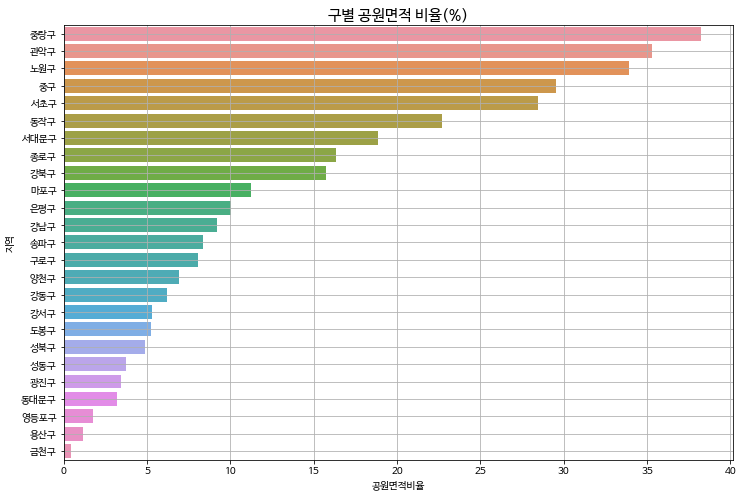

In [160]:
plt.figure(figsize=(12,8))
sns.barplot(x='공원면적비율', y='지역', data=df.sort_values(by='공원면적비율', ascending=False))
plt.title('구별 공원면적 비율(%)', size=15)
plt.grid()
plt.show()

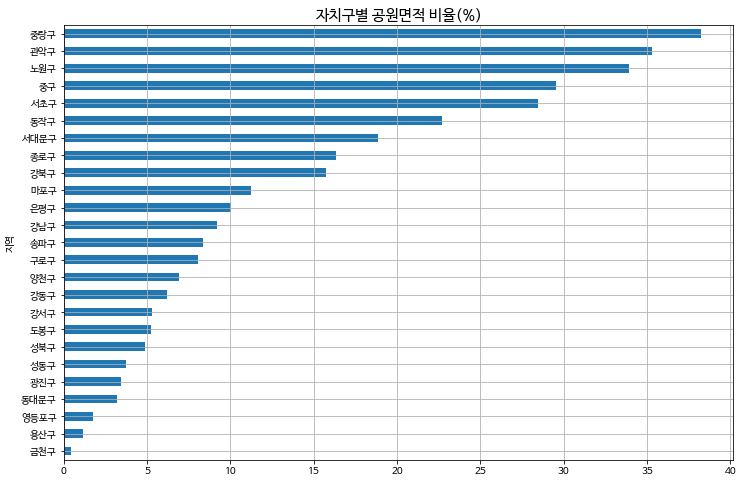

In [162]:
df.set_index('지역', inplace=True)
df.공원면적비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()

- 자치구별 인당 공원면적

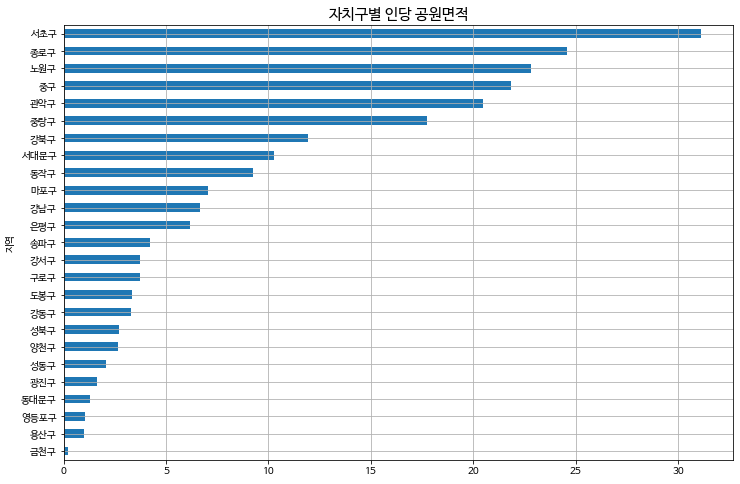

In [164]:
df.인당_공원면적.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 인당 공원면적', size=15)
plt.show()

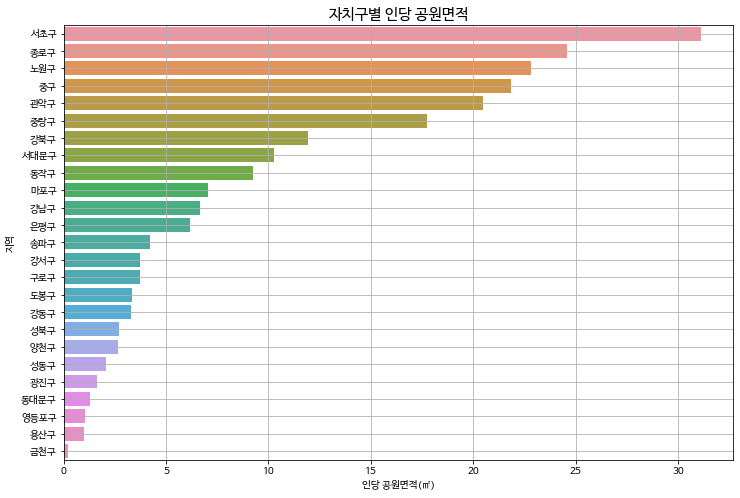

In [167]:
df.reset_index(inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x='인당_공원면적', y='지역', data=df.sort_values(by='인당_공원면적', ascending=False))
plt.title('자치구별 인당 공원면적', size=15)
plt.xlabel('인당 공원면적(㎡)')
plt.grid()
plt.show()

In [169]:
df.to_csv('자치구별_공원_현황.csv', index=False)